## Algoritmo Genético - Ejemplo

Importar librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython import display

## Recordando las funciones en Python

In [26]:
# Función a maximizar. Función de Aptitud (Fitness). 
# Objetivo encontrar el máximo de esta función

def F(x): 
   # return np.sin(10*x)*x + np.cos(2*x)*x
     return np.sin(x*x*x) + np.sin(x*x)

In [27]:
# Convierte el cromosoma binario a decimal y lo normaliza a un rango XBound
# Un número binario b0,..., bq se convierte a un valor contínuo en el rango [x_l, x_h]
# mediante la siguiente fórmula:
# x = x_l + ((x_h - x_l)/(2^q -1))*sum(2^k * b_k)

def ValueChromosome(population): 
    return XBound[0] + ((XBound[1]-XBound[0])/float(2**ChromosomeSize-1)) *\
           population.dot(2 ** np.arange(ChromosomeSize)[::-1])
    

In [28]:
# Selección en base a un método de selección de Roulette-wheel (fitness-proporcional a la selección)

def Selection(population, F_values):  
    # Convierte los valores de aptitud (fitness) en valores no negativos para la selección 
    fitness = F_values - np.min(F_values)
    # Determinar el orden de selección en función de la probabilidad p
    idx = np.random.choice(np.arange(PopulationSize), size=PopulationSize, replace=True,
                           p=fitness/fitness.sum())
    return population[idx]


In [29]:
# Operación de crossover de Genes

def Crossover(parent, population):  
    if np.random.rand() < CrossoverProb:
        # seleccionar otro individuo de la población
        i_ = np.random.randint(0, PopulationSize, size=1)    
        # Elegir puntos de cruce (crossover points)
        cross_points = np.random.randint(0, 2, size=ChromosomeSize).astype(np.bool)  
        # Reproducción - generación de un hijo
        parent[cross_points] = population[i_, cross_points]                          

    return parent


In [30]:
# Mutación de Genes

def Mutate(child):
    for point in range(ChromosomeSize):
        if np.random.rand() < MutationProb:
            if child[point] == 0: child[point] = 1 
            else: child[point] = 0

    return child


In [31]:
# Inicializar la población y seleccionar el mejor individuo

def Init():
    # Inicializar la población de cromosomas
    population = np.random.randint(2, size=(PopulationSize, ChromosomeSize))
    
    # El cromosoma con mayor valor de función es el mejor individuo en este momento
    BestIndividual =  ValueChromosome(population[np.argmax(F(ValueChromosome(population))), :])
    
    return population, BestIndividual


In [32]:
# Active el modo interactivo y trace la función para maximizar

def ActivatePlot():
    # Activar el modo interactivo (para trazar los puntos en el lazo loop)
    plt.ion()      
    
    # Plotear la función
    x = np.arange(0,0.01) # Tome puntos de x en el dominio respectivo, en pasos de 0.01
    plt.plot(x, F(x))  
    
    return(x)


In [33]:
# Mostrar una solución en el gráfico

def PlotSolution(BestX, population):
    # Un diagrama de dispersión (Scatterplot ) muestra el valor de 2 conjuntos de datos en 2 dimensiones
    # Each dot represents an observation
    plt.scatter(BestX, F(BestX), s=200, lw=0, c='red', alpha=0.5)
    display.clear_output(wait=True)
    display.display(plt.gcf()) 
    print("Most fitted chromosome: ", population[np.argmax(F(ValueChromosome(population))), :],
          "==> point (x,y) = (",BestX, ",",
          F(BestX),")" )
#    return

In [34]:
# Calculo del cambio relativo promedio durante todas las generaciones
def ComputeAvRelChange(AvRelChange,BestX,BestIndividual):
    AvRelChange += np.absolute((F(BestX)- F(BestIndividual))/F(BestIndividual))
    
    return(AvRelChange)


In [35]:
# Función principal

def main():

    AvRelChange = 1000.0
    count = 0
    population, BestIndividual = Init()

    # Activar plot para ver soluciones dinámicamente
    x=ActivatePlot()
    
    # Plotear el mejor chromosoma (individuo) de la población inicial
    PlotSolution(BestIndividual, population)

    # El algoritmo se detiene cuando el número de generaciones alcanza el valor máximo de generaciones
    # o cuando el cambio relativo promedio en el valor de la función de aptitud es mínimo (nulo)
    # es decir, menos que la Función de tolerancia
    for n in range(MaxNumGenerations):

        # Evaluar los valores de aptitud de la población
        F_values = F(ValueChromosome(population))
                     
        # Seleccionat a los mejores individuos utilizando la selección proporcional a la aptitud
        population = Selection(population, F_values)

        # Obtener el mayor valor de función --> mejor solución en la gráfica
        BestX = ValueChromosome(population[np.argmax(F_values), :])
        
        # Plotear el mejor individuo(cromosoma) de esta generación
        PlotSolution(BestX, population)
            
        # Calculo del cambio relativo promedio durante las generaciones
        AvRelChange = ComputeAvRelChange(AvRelChange,BestX,BestIndividual)
        
        # Selección de los mejores individuos de todas las generaciones
        if  (F(BestIndividual) <= F(BestX)):
            BestIndividual = BestX

        # Operadores genéticos de Crossover y mutación
        population_copy = population.copy()
        for parent in population:
            # Crossover
            child = Crossover(parent, population_copy)
            child = Mutate(child)
            # Los padres son reemplazados por sus hijos (desendencia)
            parent[:] = child     
            
        print('\nAverage Relative Change:',AvRelChange/(n+1))
        
        time.sleep(0.5)
        if AvRelChange/(n+1) < FTolerance: break

    plt.ioff()

    # Plotear la última solución (respuesta optimizada)
    plt.clf()
    plt.plot(x, F(x))
    plt.scatter(BestIndividual, F(BestIndividual), s=200, lw=0, c='green')

    plt.show()
    print("Final Result in",n,"generations. Maximum of the function:", F(BestIndividual),  \
          "at x =",BestIndividual)
            

### Parametros del algoritmo

In [52]:
PopulationSize = 70    # Número de individuos en la población
ChromosomeSize =  10    # Número de genes (bits) de un individuo (cromosoma)

MaxNumGenerations = 35 # Número máximo de generaciones

CrossoverProb = 0.8     # Probabilidad de Crossover 
MutationProb = 0.03      # Probabilidad de Mutación

XBound = [-3, 3]         # x upper y lower bounds [x_l, x_h]

FTolerance = 0.01   # Función de tolerancia — El algoritmo se ejecuta hasta que el cambio 
                    # relativo promedio en el valor de la función de aptitud durante las generaciones 
                    # es menor que la función de tolerancia


Ejecución del algoritmo

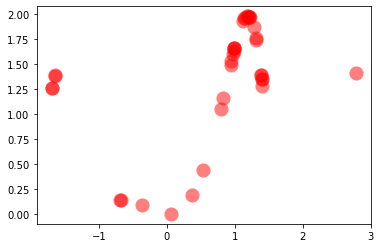

Most fitted chromosome:  [1 0 1 1 0 0 1 0 0 1] ==> point (x,y) = ( 0.7888563049853374 , 1.0543213524217223 )

Average Relative Change: 28.891684421965458


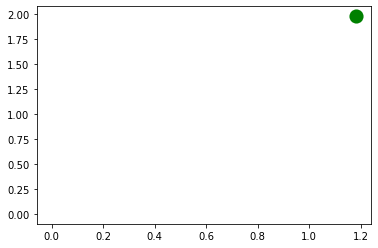

Final Result in 34 generations. Maximum of the function: 1.9816967687506075 at x = 1.1818181818181817

Time needed: 30.2866 seconds


In [53]:
if __name__ == '__main__':
    start_time = time.time()
    main()
    print("\nTime needed: %.4f seconds" % (time.time() - start_time))